In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import seaborn as sns


In [2]:
dataset=pd.read_csv('train.csv')
dataset.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
dataset.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [4]:
dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
X=dataset.drop(['is_promoted'],axis=1)
X.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [6]:
X=X.drop(['employee_id','region'],axis=1)
X.head(5)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [7]:
y=dataset['is_promoted']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: is_promoted, dtype: int64

In [8]:
X.describe()


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


 We in count row that there is not equal count, so there will be nan values...

### Nan remove

In [9]:
nan_values=X.isna().sum()
nan_values

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
edu_count=X['education'].value_counts()
edu_count

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

Printing education qualification highet number

In [11]:
max_id=edu_count.idxmax()
max_id

"Bachelor's"

In [12]:
X['department'].value_counts()


Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

Lets look on categorical values...is dependant data is balanced ?

In [13]:
y.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

### NO, 0 is greater than 1. 

In [14]:
X['education']=X['education'].fillna(max_id)
X.head(10)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73
5,Analytics,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85
6,Operations,Bachelor's,f,other,1,31,3.0,5,0,0,59
7,Operations,Master's & above,m,sourcing,1,33,3.0,6,0,0,63
8,Analytics,Bachelor's,m,other,1,28,4.0,5,0,0,83
9,Sales & Marketing,Master's & above,m,sourcing,1,32,5.0,5,1,0,54


In [15]:
mean_of_rating=int(X['previous_year_rating'].mean())
mean_of_rating

3

In [16]:
X['previous_year_rating']=X['previous_year_rating'].fillna(mean_of_rating)
X

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73
5,Analytics,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85
6,Operations,Bachelor's,f,other,1,31,3.0,5,0,0,59
7,Operations,Master's & above,m,sourcing,1,33,3.0,6,0,0,63
8,Analytics,Bachelor's,m,other,1,28,4.0,5,0,0,83
9,Sales & Marketing,Master's & above,m,sourcing,1,32,5.0,5,1,0,54


### Lets all values filled or not

In [17]:
X.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


### Yes ! it filled 

## Now  Visualisation 

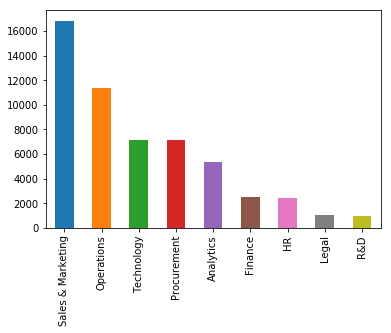

In [18]:
X['department'].value_counts().plot(kind='bar')

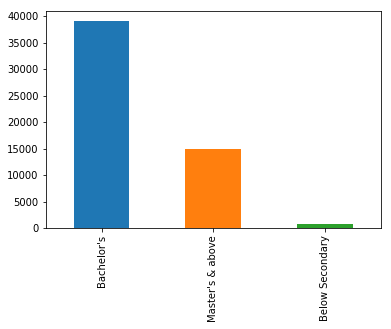

In [19]:
X['education'].value_counts().plot(kind='bar')

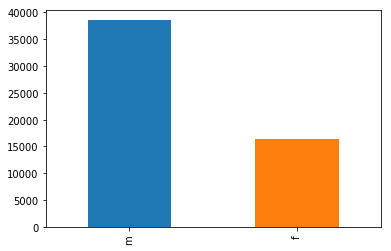

In [20]:
X['gender'].value_counts().plot(kind='bar')

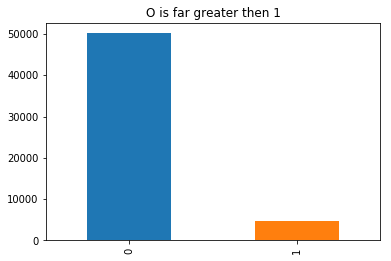

In [21]:
y.value_counts().plot(kind='bar',title='O is far greater then 1')

### Wow! zero is how much in numbers... 

In [22]:
department_vs_promoted=pd.crosstab(index=X['department'],columns=y)
department_vs_promoted

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


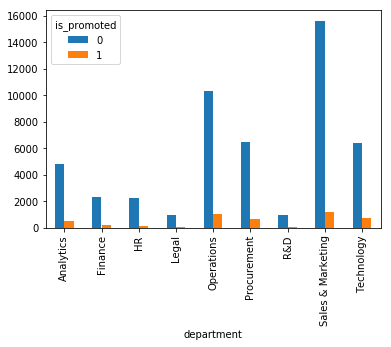

In [23]:
department_vs_promoted.plot(kind='bar')

In [24]:
education_vs_promoted=pd.crosstab(index=X['education'],columns=y)

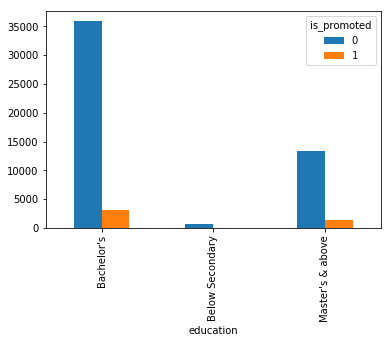

In [25]:
education_vs_promoted.plot(kind='bar')

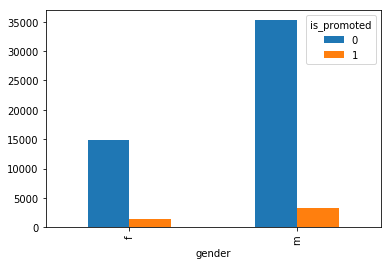

In [26]:
gender_vs_promoted=pd.crosstab(index=X['gender'],columns=y)
gender_vs_promoted.plot(kind='bar')

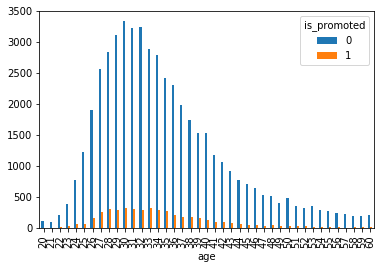

In [27]:
age_vs_promoted=pd.crosstab(index=X['age'],columns=y)
age_vs_promoted.plot(kind='bar')

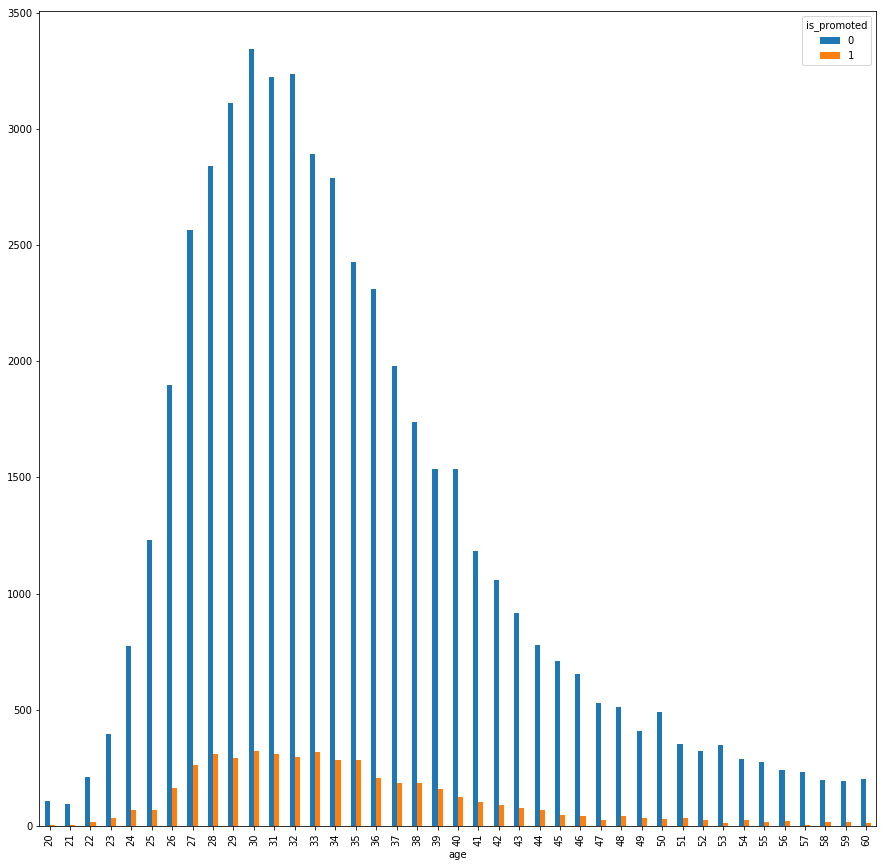

In [28]:
age_vs_promoted.plot(kind='bar',figsize=(15,15))


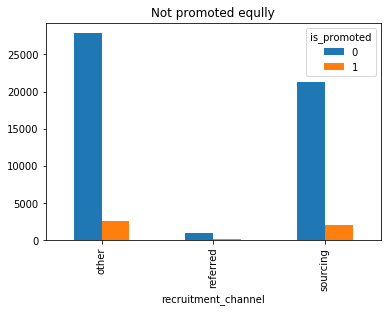

In [29]:
recruitment_channel_vs_promoted=pd.crosstab(index=X['recruitment_channel'],columns=y)
recruitment_channel_vs_promoted.plot(kind='bar',title='Not promoted eqully')

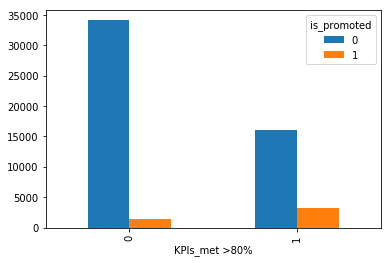

In [30]:
KPI_vs_promoted=pd.crosstab(index=X['KPIs_met >80%'],columns=y)
KPI_vs_promoted.plot(kind='bar')

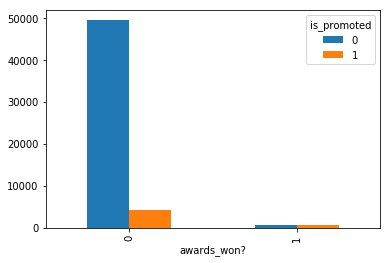

In [31]:
award_vs_promoted=pd.crosstab(index=X['awards_won?'],columns=y)
award_vs_promoted.plot(kind='bar')

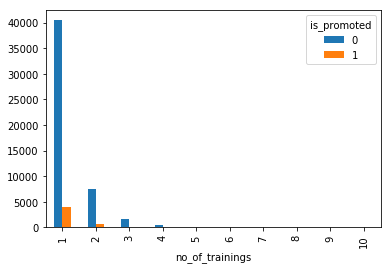

In [32]:
noTraining_vs_promoted=pd.crosstab(index=X['no_of_trainings'],columns=y)
noTraining_vs_promoted.plot(kind='bar')

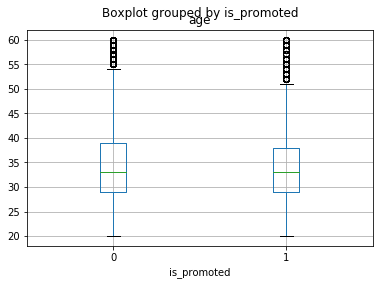

In [33]:
dataset.boxplot(column='age',by='is_promoted')

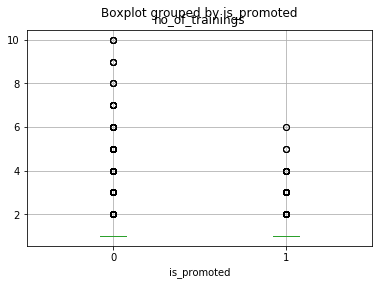

In [34]:
dataset.boxplot(column='no_of_trainings',by='is_promoted')

### many outlier in the plot

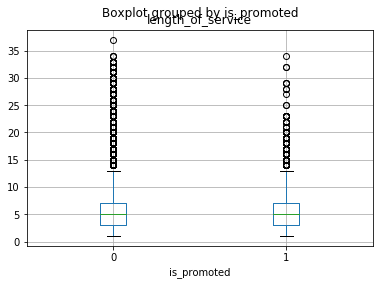

In [35]:
dataset.boxplot(column='length_of_service',by='is_promoted')

In [36]:
X1=X

In [37]:
X1=pd.get_dummies(X1)
X1.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,1,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,1,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,1,1,0,0,0,1,1,0,0


## Make model for feature selection

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
xgb_model=XGBClassifier()

### selecting max 20 feature..

In [39]:
from sklearn.feature_selection import RFE
cv=RFE(xgb_model,20)
cv.fit(X1,y)
cv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False])

In [40]:
cv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1,
       1, 5])

In [41]:
### lets take one more feature techniques

In [42]:
from sklearn.linear_model import LogisticRegression
logistic_regressor=LogisticRegression()


In [43]:
from sklearn.feature_selection import RFECV
cv=RFECV(logistic_regressor,cv=10,scoring=None)
cv.fit(X1,y)
cv.support_

array([False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [44]:
cv.ranking_

array([2, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### Lets Remove all those 

In [45]:
X1=X1.drop(['age'],axis=1)
X1=X1.drop(['length_of_service'],axis=1)
X1=X1.drop(['gender_m'],axis=1)
X1=X1.drop(['education_Below Secondary'],axis=1)
X1=X1.drop(['department_Operations'],axis=1)
X1=X1.drop(['department_Finance'],axis=1)
X1=X1.drop(['department_Legal'],axis=1)
X1=X1.drop(['gender_f'],axis=1)
X1=X1.drop(["education_Master's & above"],axis=1)
X1.head(5)

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_HR,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,5.0,1,0,49,0,0,0,0,1,0,0,0,0,1
1,1,5.0,0,0,60,0,0,0,0,0,0,1,1,0,0
2,1,3.0,0,0,50,0,0,0,0,1,0,1,0,0,1
3,2,1.0,0,0,50,0,0,0,0,1,0,1,1,0,0
4,1,3.0,0,0,73,0,0,0,0,0,1,1,1,0,0


In [46]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier=RandomForestClassifier(n_estimators=500,criterion='entropy',verbose=1,random_state=0)


### Spliting into train and test

### we used strtified smapling because it is imbance data set

In [50]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y,
                                                    stratify=y, 
                                                    test_size=0.20,random_state=42)

In [51]:
forest_classifier.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   35.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

In [52]:
y_pred_forest=forest_classifier.predict(X_test)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.6s finished


### calculate f1 score for imbalance data set..

In [53]:
f1_score(y_test,y_pred_forest)

0.4956268221574344

In [54]:
accuracy_score(y_test,y_pred_forest)

0.9368728334245575

### Thanks for reading and learing ☺